In [1]:
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.mixture import GaussianMixture

# Citire si afisare 2d10c

In [2]:

file = open('./date/2d-10c.dat', 'r')
i = 0;
# nrElemente, atribute, clase, minx,miny,maxx,maxy = 0;

for line in file:
    item = line.rstrip() # strip off newline and any other trailing whitespace
    if(i==0):
        nrElemente = item.split(" ")[0]
        print(nrElemente)
        atribute = item.split(" ")[1]
        clase = item.split(" ")[2]
        array2d10c = np.empty([int(nrElemente),3])
    if(i==1):
        minx = item.split(" ")[0]
        miny = item.split(" ")[1]
    if(i==2):
        maxx = item.split(" ")[0]
        maxy = item.split(" ")[1]
    if(i>2):
        array2d10c[i-3] = item.split(" ")
#         array2d10c = np.append(array2d10c,[1,2,3], axis = 0)
    i+=1




2525


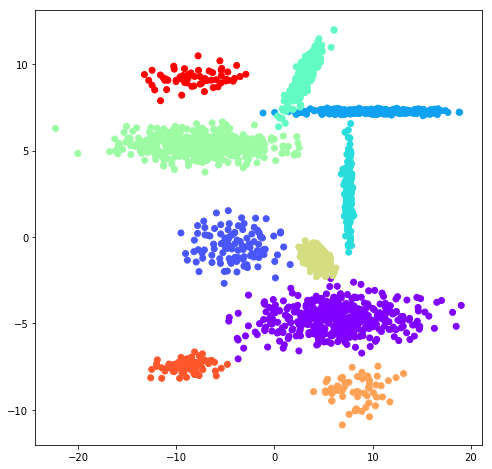

In [3]:
fig = plt.figure(figsize=(8,8))
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=array2d10c[:,2],cmap='rainbow')

Dupa afisare cred ca cel mai potrivit pentru acest set de date ar fi clusterizarea utilizand alogritmul em pentru ca exista clustere care se suprapun si au diferite forme.

ARI: 0.305


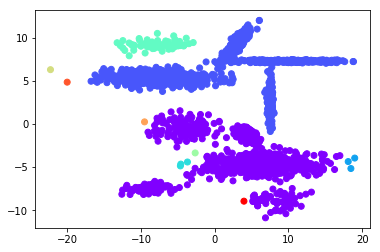

In [4]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')  
cluster.fit_predict(array2d10c[:,:2])  
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],cluster.labels_))

ARI: 0.518


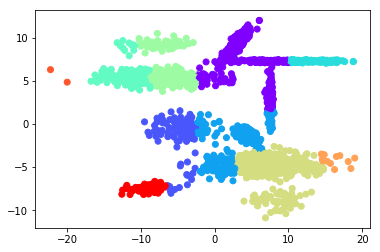

In [5]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')  
cluster.fit_predict(array2d10c[:,:2])  
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],cluster.labels_))

ARI: 0.662


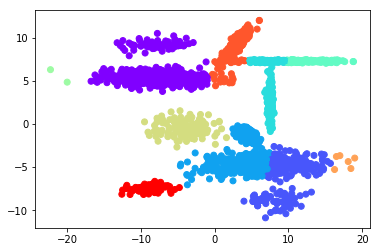

In [6]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')  
cluster.fit_predict(array2d10c[:,:2])  
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],cluster.labels_))

ARI: 0.661


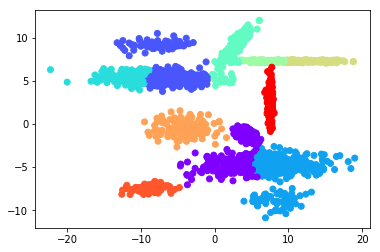

In [7]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(array2d10c[:,:2])  
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],cluster.labels_))

0.5
ARI: 0.899


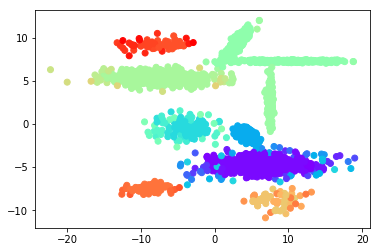

In [8]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=1).fit(array2d10c[:,:2])
    if(metrics.adjusted_rand_score(array2d10c[:,2],db.labels_)>max):
        max = metrics.adjusted_rand_score(array2d10c[:,2],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(array2d10c[:,:2])
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],db.labels_))



        

ARI: 0.723


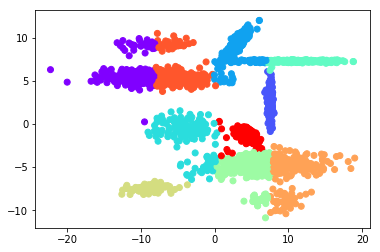

In [9]:
kmeans = KMeans(n_clusters=10,random_state=0).fit(array2d10c[:,:2])
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],kmeans.labels_))

ARI: 0.998


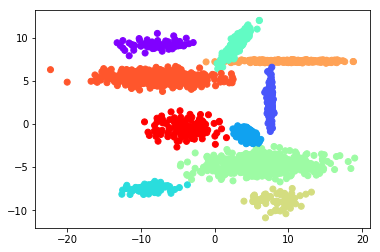

In [10]:
emLabels = GaussianMixture(n_components=10).fit_predict(array2d10c[:,:2])
plt.scatter(array2d10c[:,0], array2d10c[:,1], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(array2d10c[:,2],emLabels))

EM:0.998

DBSCAN: 0.899

KMEANS: 0.723

HIERARCHICAL: 0.662


# IRIS DATASET

In [11]:
iris = np.loadtxt(open("./date/iris.csv", "rb"), delimiter=",", skiprows=0)
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

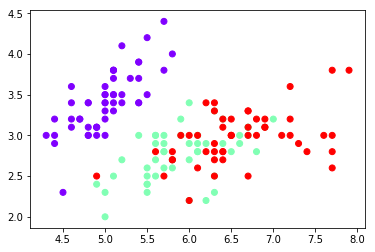

In [12]:
plt.scatter(iris[:,0], iris[:,1], c=iris[:,4],cmap='rainbow')

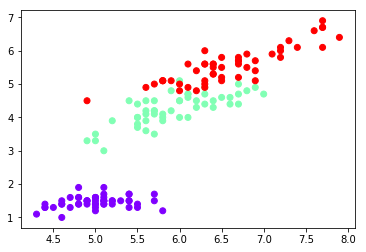

In [13]:
plt.scatter(iris[:,0], iris[:,2], c=iris[:,4],cmap='rainbow')

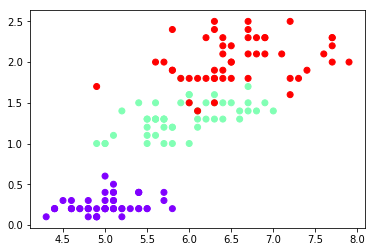

In [14]:
plt.scatter(iris[:,0], iris[:,3], c=iris[:,4],cmap='rainbow')

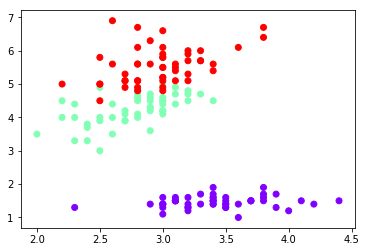

In [15]:
plt.scatter(iris[:,1], iris[:,2], c=iris[:,4],cmap='rainbow')

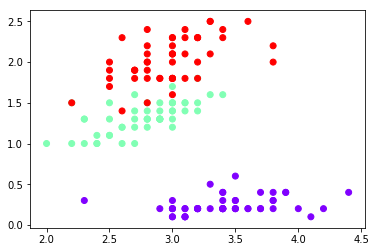

In [16]:
plt.scatter(iris[:,1], iris[:,3], c=iris[:,4],cmap='rainbow')

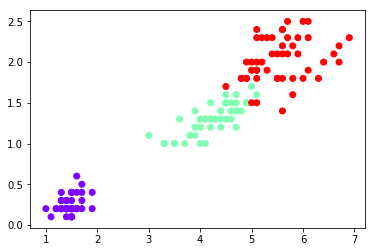

In [17]:
plt.scatter(iris[:,2], iris[:,3], c=iris[:,4],cmap='rainbow')

Cel mai probabil ar merge un em. Pentru ca va identifica bine centrele celor trei grupuri si va identifica si disperia grupului rosu.

ARI: 0.564


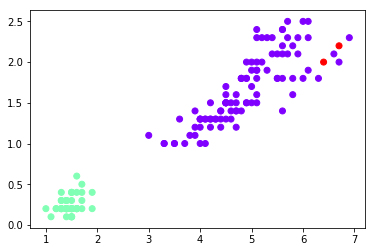

In [18]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
cluster.fit_predict(iris[:,:4])  
plt.scatter(iris[:,2], iris[:,3], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],cluster.labels_))

ARI: 0.642


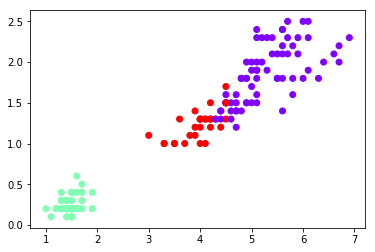

In [19]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(iris[:,:4])  
plt.scatter(iris[:,2], iris[:,3], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],cluster.labels_))

ARI: 0.759


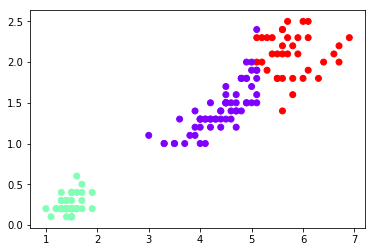

In [20]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(iris[:,:4])  
plt.scatter(iris[:,2], iris[:,3], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],cluster.labels_))

ARI: 0.731


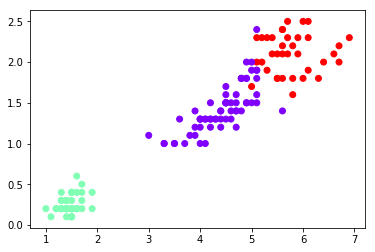

In [21]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(iris[:,:4])  
plt.scatter(iris[:,2], iris[:,3], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],cluster.labels_))


0.6
ARI: 0.540


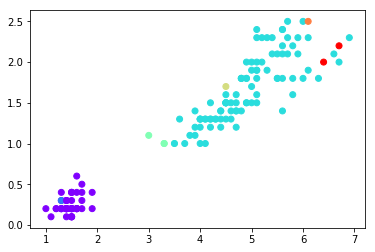

In [22]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=20).fit(iris[:,:4])
    if(metrics.adjusted_rand_score(iris[:,4],db.labels_)>max):
        max = metrics.adjusted_rand_score(iris[:,4],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(iris[:,:4])
plt.scatter(iris[:,2], iris[:,3], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],db.labels_))


        

ARI: 0.730


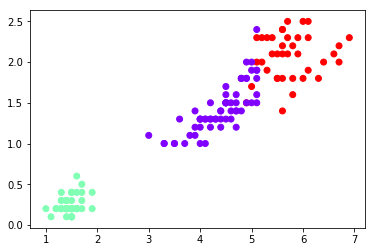

In [23]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(iris[:,:4])
plt.scatter(iris[:,2], iris[:,3], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],kmeans.labels_))

ARI: 0.904


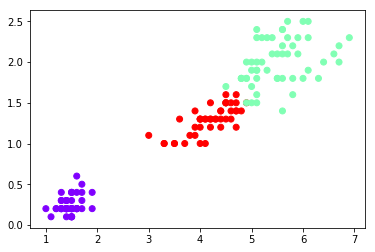

In [24]:
emLabels = GaussianMixture(n_components=3).fit_predict(iris[:,:4])
plt.scatter(iris[:,2], iris[:,3], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(iris[:,4],emLabels))

# LONG DATASET

In [25]:
longData = np.loadtxt( './date/long.dat' )

longData[0]

array([ 0.167967, -0.17124 ,  0.      ])

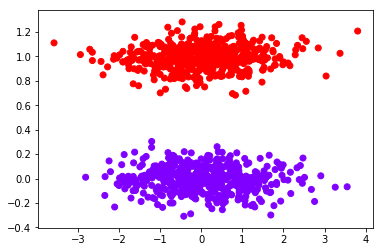

In [26]:
plt.scatter(longData[:,0], longData[:,1], c=longData[:,2],cmap='rainbow')

Ar merge un DBSCAN pentru ca se bazeaza pe densitate si va identifica foarte bine cele doua grupuri.

ARI: 0.000


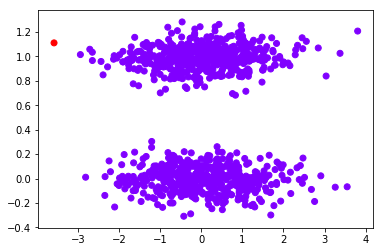

In [27]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(longData[:,:2])  
plt.scatter(longData[:,0], longData[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],cluster.labels_))

ARI: 0.009


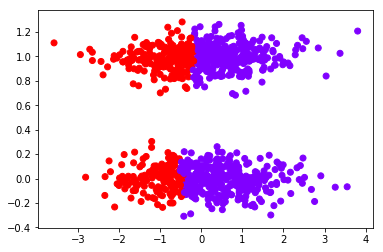

In [28]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(longData[:,:2])  
plt.scatter(longData[:,0], longData[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],cluster.labels_))

ARI: 0.000


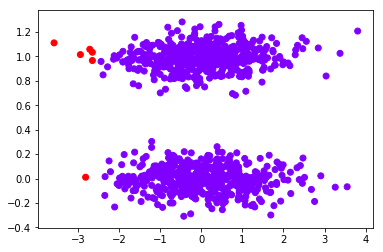

In [29]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(longData[:,:2])  
plt.scatter(longData[:,0], longData[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],cluster.labels_))

ARI: 0.000


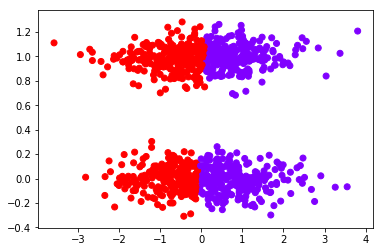

In [30]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(longData[:,:2])  
plt.scatter(longData[:,0], longData[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],cluster.labels_))


0.4
ARI: 0.994


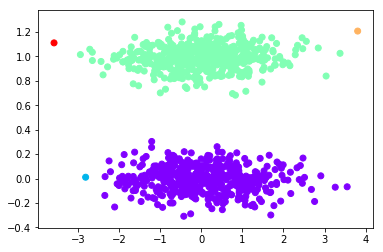

In [31]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=20).fit(longData[:,:2])
    if(metrics.adjusted_rand_score(longData[:,2],db.labels_)>max):
        max = metrics.adjusted_rand_score(longData[:,2],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(longData[:,:2])
plt.scatter(longData[:,0], longData[:,1], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],db.labels_))


        

ARI: -0.001


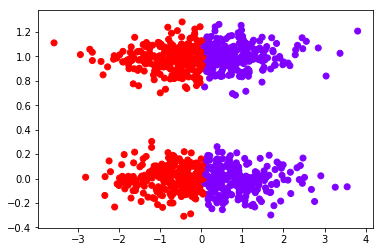

In [32]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(longData[:,:2])
plt.scatter(longData[:,0], longData[:,1], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],kmeans.labels_))

ARI: 0.015


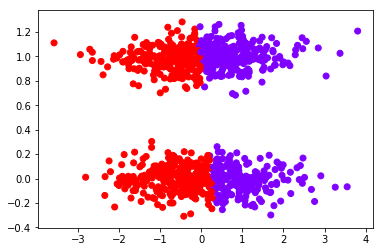

In [33]:
emLabels = GaussianMixture(n_components=2).fit_predict(longData[:,:2])
plt.scatter(longData[:,0], longData[:,1], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(longData[:,2],emLabels))

# ORDER 2-3 CLUST

In [34]:
order23 = np.loadtxt(open("./date/order2-3clust.csv", "rb"), delimiter=",", skiprows=0)

order23[0]

array([ -8.80489517, 104.4585715 ,   0.        ])

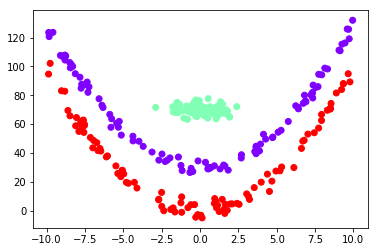

In [35]:
plt.scatter(order23[:,0], order23[:,1], c=order23[:,2],cmap='rainbow')

Ar merge un DBSCAN pentru ca se bazeaza pe densitate si va identifica foarte bine grupul de sus, si partial celelalte grupuri.

ARI: 0.004


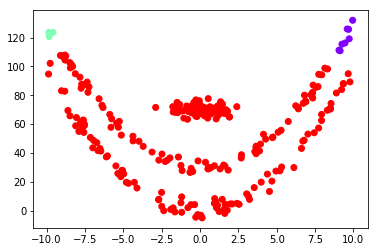

In [36]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
cluster.fit_predict(order23[:,:2])  
plt.scatter(order23[:,0], order23[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],cluster.labels_))

ARI: 0.292


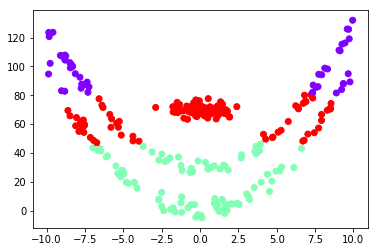

In [37]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(order23[:,:2])  
plt.scatter(order23[:,0], order23[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],cluster.labels_))

ARI: 0.179


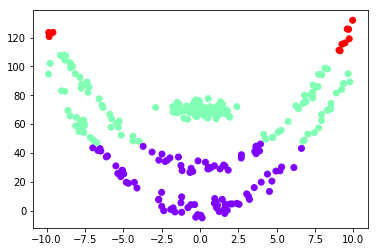

In [38]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(order23[:,:2])  
plt.scatter(order23[:,0], order23[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],cluster.labels_))

ARI: 0.313


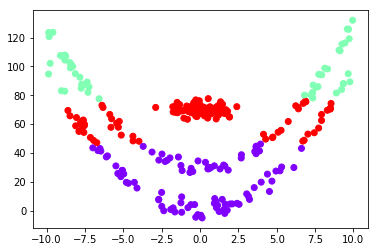

In [39]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(order23[:,:2])  
plt.scatter(order23[:,0], order23[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],cluster.labels_))


2.9
ARI: 0.481


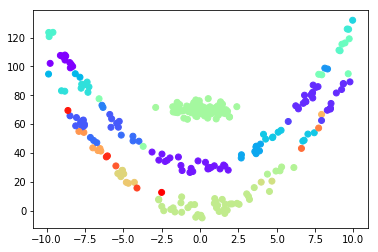

In [40]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=1).fit(order23[:,:2])
    if(metrics.adjusted_rand_score(order23[:,2],db.labels_)>max):
        max = metrics.adjusted_rand_score(order23[:,2],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(order23[:,:2])
plt.scatter(order23[:,0], order23[:,1], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],db.labels_))


        

ARI: 0.242


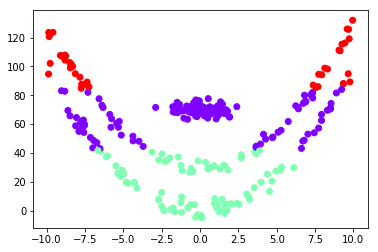

In [41]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(order23[:,:2])
plt.scatter(order23[:,0], order23[:,1], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],kmeans.labels_))

ARI: 0.381


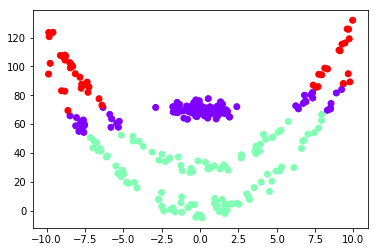

In [42]:
emLabels = GaussianMixture(n_components=3).fit_predict(order23[:,:2])
plt.scatter(order23[:,0], order23[:,1], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(order23[:,2],emLabels))

# SMILE

In [43]:
smile = np.loadtxt(open("./date/smile.csv", "rb"), delimiter=",", skiprows=0)

smile[0]

array([-0.67424502, -0.66449233,  0.        ])

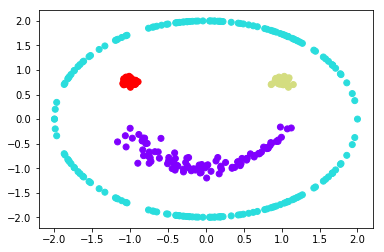

In [44]:
plt.scatter(smile[:,0], smile[:,1], c=smile[:,2],cmap='rainbow')

Cel mai bine ar clasifica acest set de date single linkeage pentru ca distanta dintre grupuri este mai mare decat distanta dintre elementele din grup

ARI: 1.000


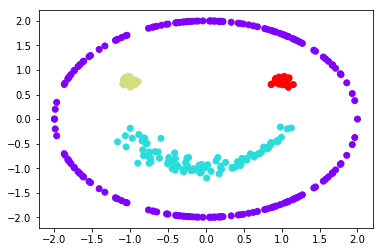

In [45]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster.fit_predict(smile[:,:2])  
plt.scatter(smile[:,0], smile[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],cluster.labels_))

ARI: 0.191


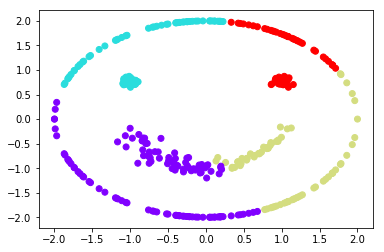

In [46]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster.fit_predict(smile[:,:2])  
plt.scatter(smile[:,0], smile[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],cluster.labels_))

ARI: 0.215


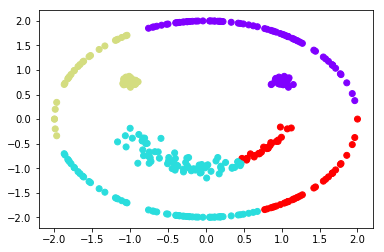

In [47]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
cluster.fit_predict(smile[:,:2])  
plt.scatter(smile[:,0], smile[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],cluster.labels_))

ARI: 0.204


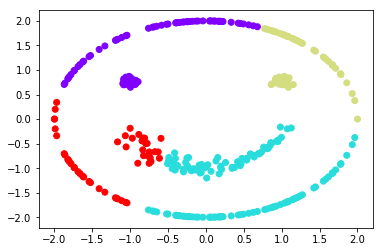

In [48]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(smile[:,:2])  
plt.scatter(smile[:,0], smile[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],cluster.labels_))


0.4
ARI: 1.000


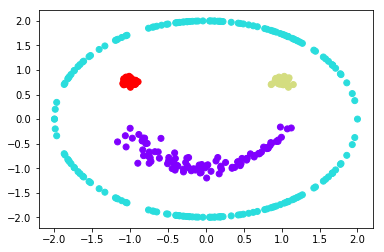

In [49]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=4).fit(smile[:,:2])
    if(metrics.adjusted_rand_score(smile[:,2],db.labels_)>max):
        max = metrics.adjusted_rand_score(smile[:,2],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(smile[:,:2])
plt.scatter(smile[:,0], smile[:,1], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],db.labels_))


        

ARI: 0.185


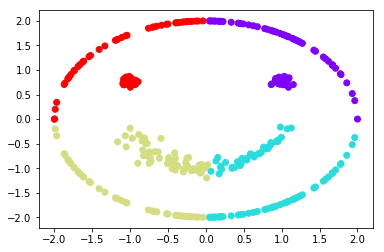

In [50]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(smile[:,:2])
plt.scatter(smile[:,0], smile[:,1], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],kmeans.labels_))

ARI: 0.193


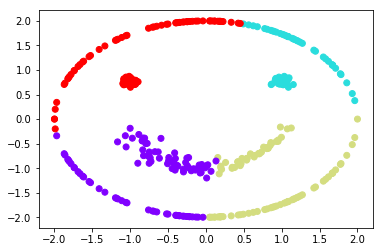

In [51]:
emLabels = GaussianMixture(n_components=4).fit_predict(smile[:,:2])
plt.scatter(smile[:,0], smile[:,1], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(smile[:,2],emLabels))

# SQUARE

In [52]:
square = np.loadtxt( './date/square.dat' )
square[0]

array([6.10273, 6.28359, 0.     ])

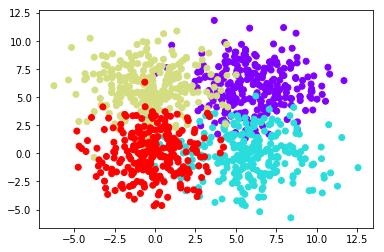

In [53]:
plt.scatter(square[:,0], square[:,1], c=square[:,2],cmap='rainbow')

Cel mai bine ar clasifica acest set de date kmeans si em pentru ca sunt formate 4 grupuri toate centrate intr-un cadran al patratului.

ARI: 0.000


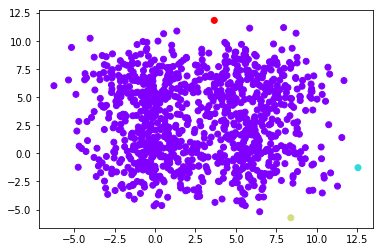

In [54]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster.fit_predict(square[:,:2])  
plt.scatter(square[:,0], square[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],cluster.labels_))

ARI: 0.550


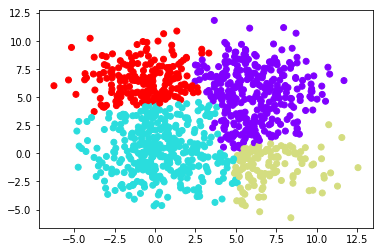

In [55]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster.fit_predict(square[:,:2])  
plt.scatter(square[:,0], square[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],cluster.labels_))

ARI: 0.604


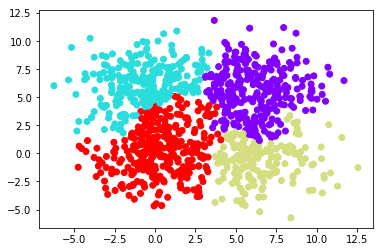

In [56]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
cluster.fit_predict(square[:,:2])  
plt.scatter(square[:,0], square[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],cluster.labels_))

ARI: 0.523


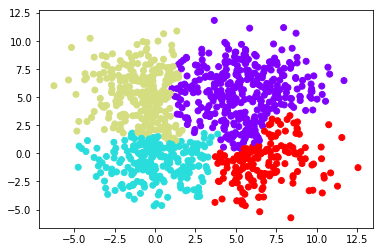

In [57]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(square[:,:2])  
plt.scatter(square[:,0], square[:,1], c=cluster.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],cluster.labels_))


0.4
ARI: 0.171


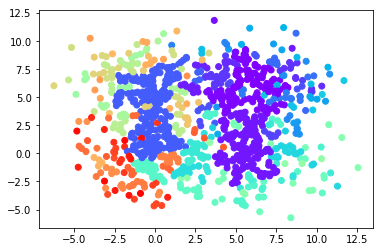

In [58]:
max = -1
eps = 0
for i in range(1,30):
    db = DBSCAN(eps=i/10, min_samples=4).fit(square[:,:2])
    if(metrics.adjusted_rand_score(square[:,2],db.labels_)>max):
        max = metrics.adjusted_rand_score(square[:,2],db.labels_)
        eps = i/10
        
db = DBSCAN(eps=eps, min_samples=1).fit(square[:,:2])
plt.scatter(square[:,0], square[:,1], c=db.labels_,cmap='rainbow')
print(eps)
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],db.labels_))


        

ARI: 0.693


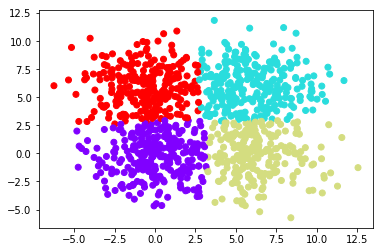

In [59]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(square[:,:2])
plt.scatter(square[:,0], square[:,1], c=kmeans.labels_,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],kmeans.labels_))

ARI: 0.682


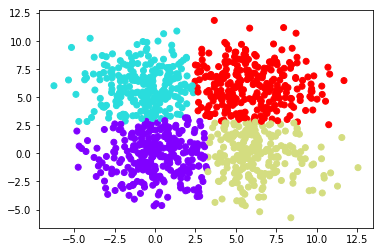

In [60]:
emLabels = GaussianMixture(n_components=4).fit_predict(square[:,:2])
plt.scatter(square[:,0], square[:,1], c=emLabels,cmap='rainbow')
print("ARI: %0.3f" % metrics.adjusted_rand_score(square[:,2],emLabels))

# Task 2

## Elbow

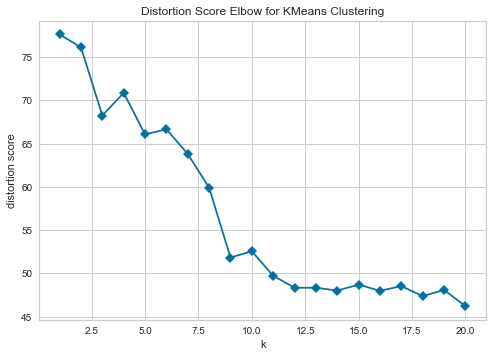

In [66]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21),timings=False)

visualizer.fit(array2d10c[:,:2])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

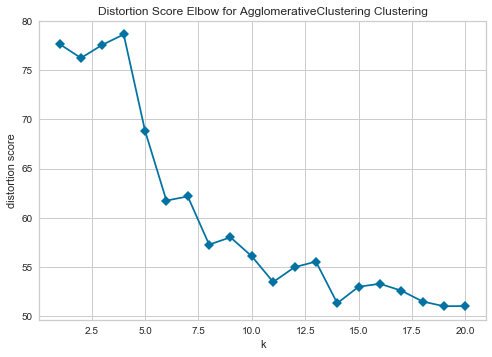

In [67]:
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering( affinity='euclidean', linkage='average') 
visualizer = KElbowVisualizer(model, k=(1,21),timings=False)

visualizer.fit(array2d10c[:,:2])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

## Sillouette Width

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.4903148315785343
For n_clusters = 3 The average silhouette_score is : 0.4903148315785343
For n_clusters = 4 The average silhouette_score is : 0.4903148315785343
For n_clusters = 5 The average silhouette_score is : 0.4903148315785343
For n_clusters = 6 The average silhouette_score is : 0.4903148315785343
For n_clusters = 7 The average silhouette_score is : 0.4903148315785343
For n_clusters = 8 The average silhouette_score is : 0.4903148315785343
For n_clusters = 9 The average silhouette_score is : 0.4903148315785343
For n_clusters = 10 The average silhouette_score is : 0.4903148315785343
For n_clusters = 11 The average silhouette_score is : 0.4903148315785343
For n_clusters = 12 The average silhouette_score is : 0.4903148315785343
For n_clusters = 13 The average silhouette_score is : 0.4903148315785343
For n_clusters = 14 The average silhouette_score is : 0.4903148315785343
For n_clusters = 15 The average silhouette_score is : 0.490

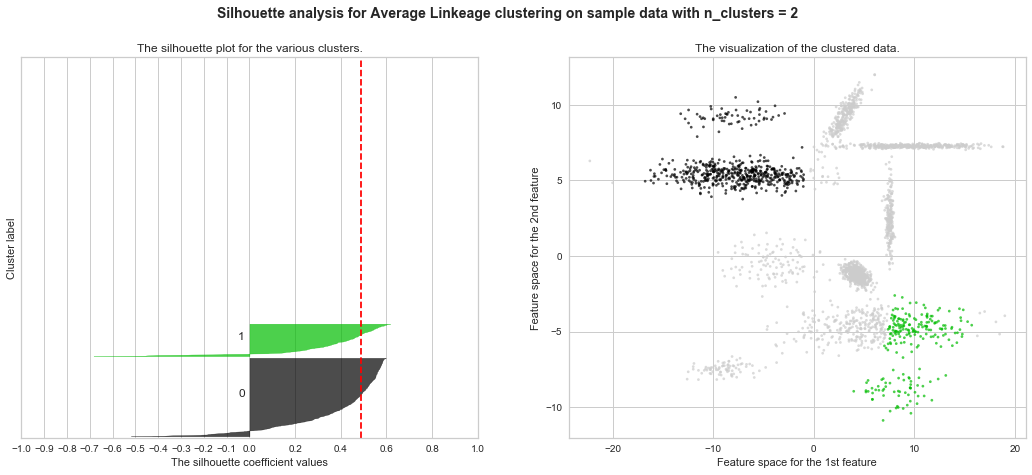

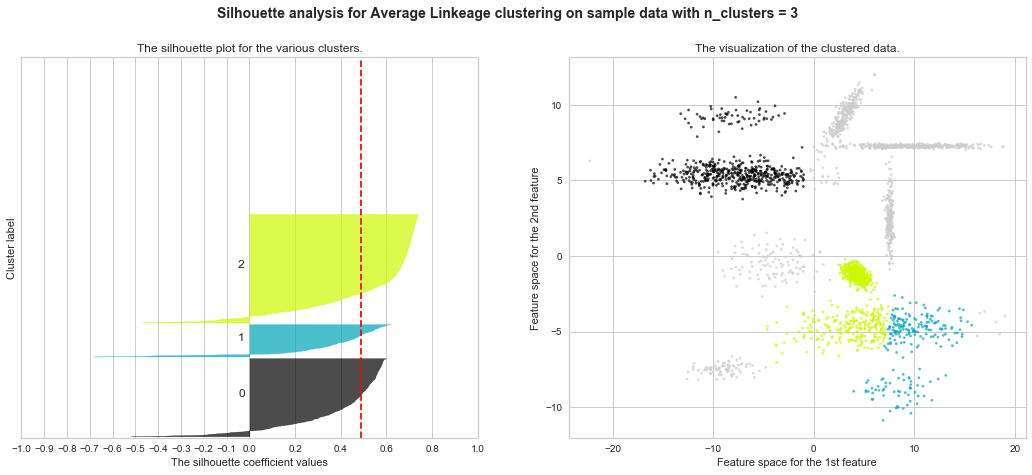

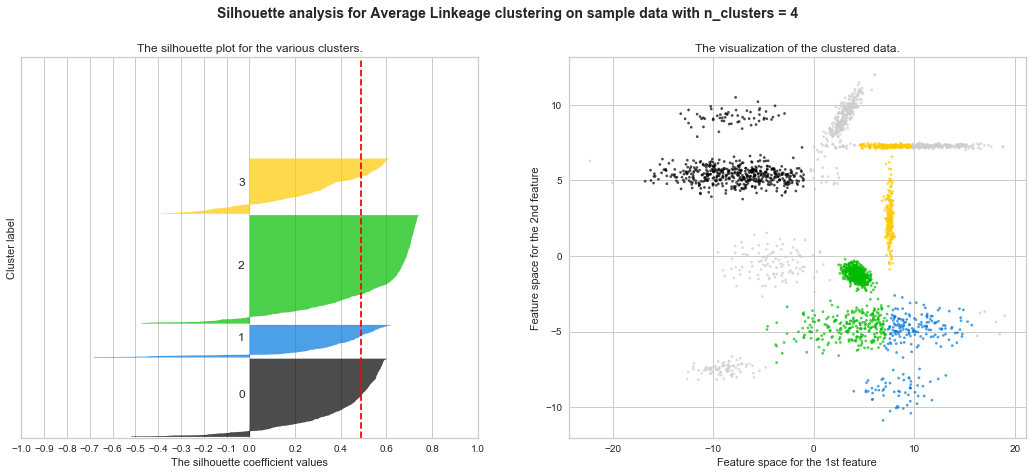

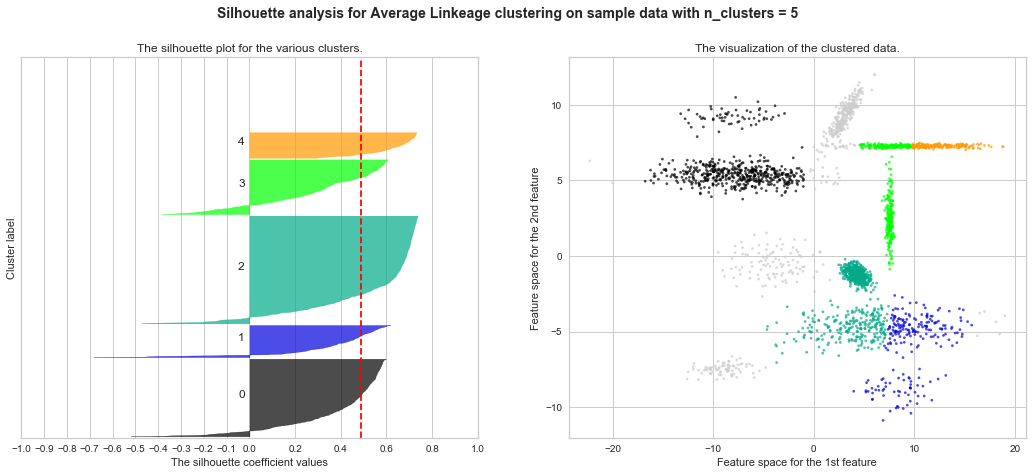

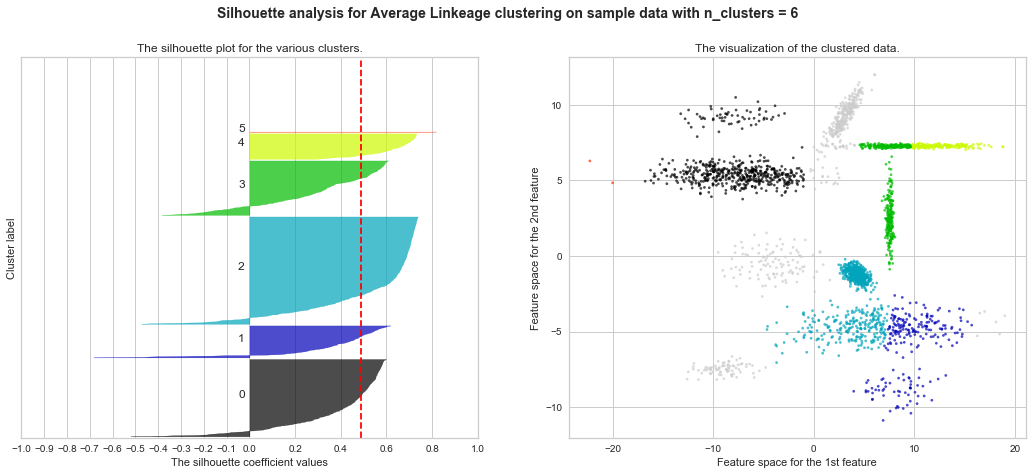

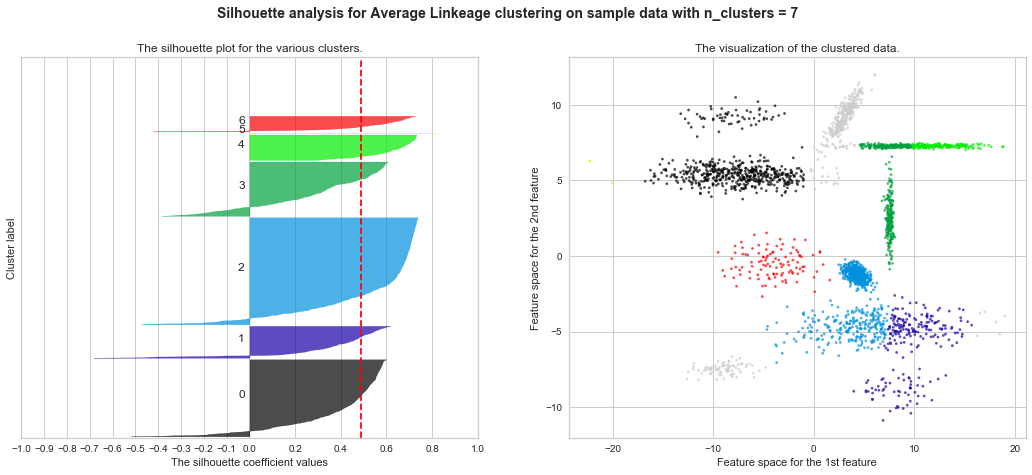

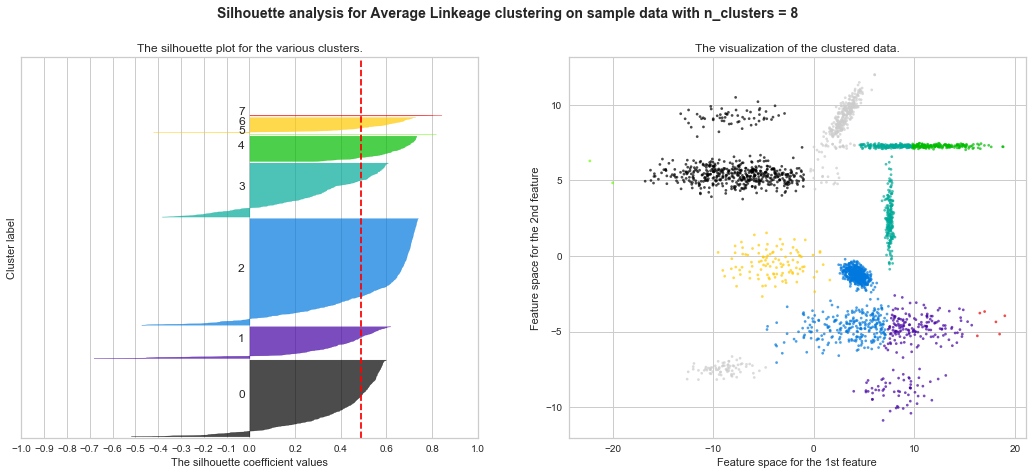

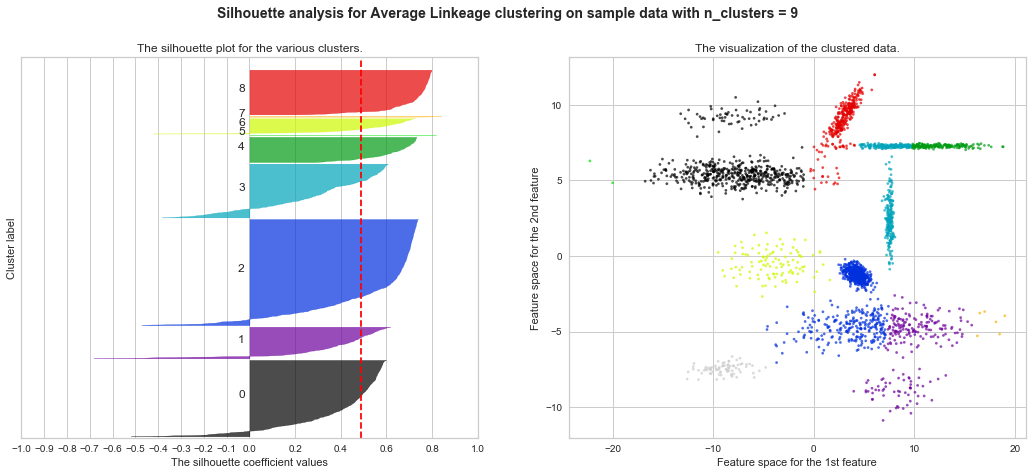

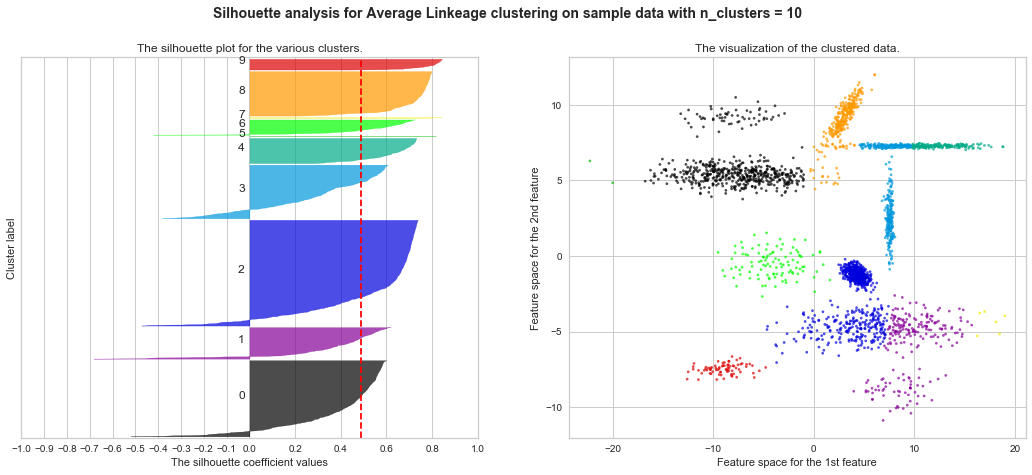

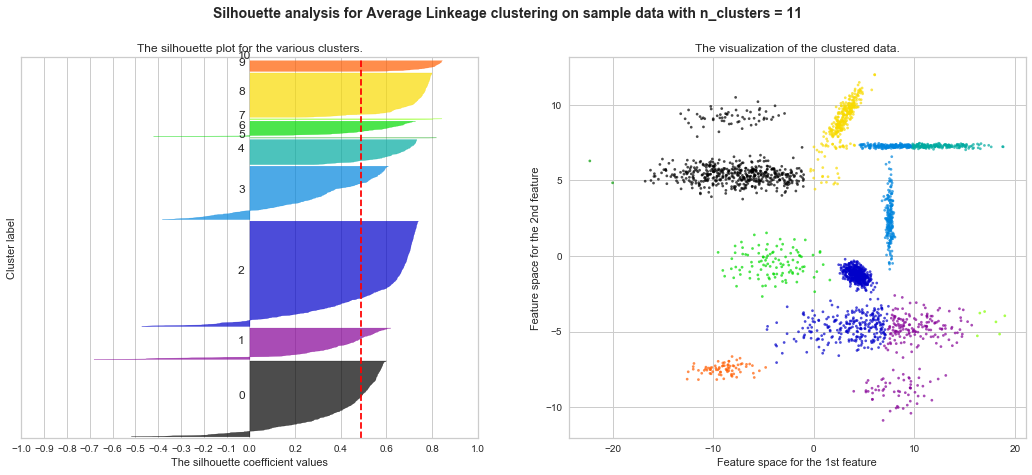

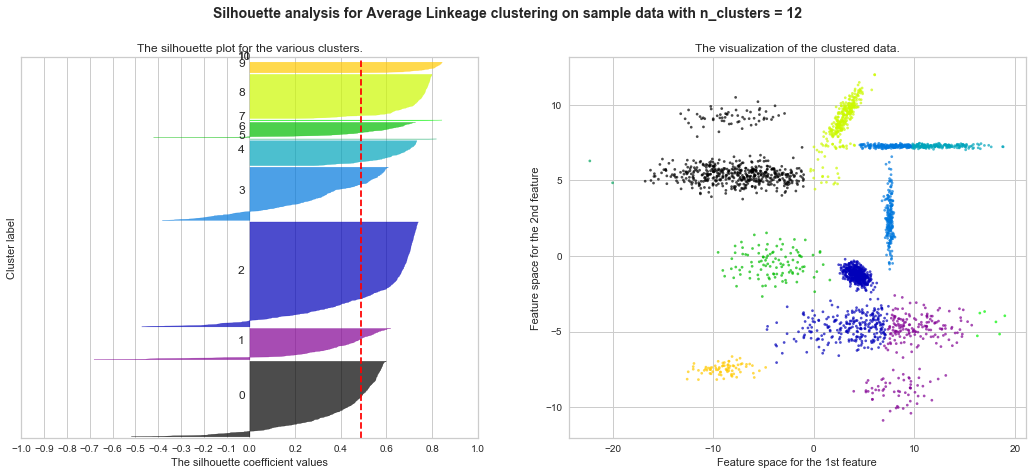

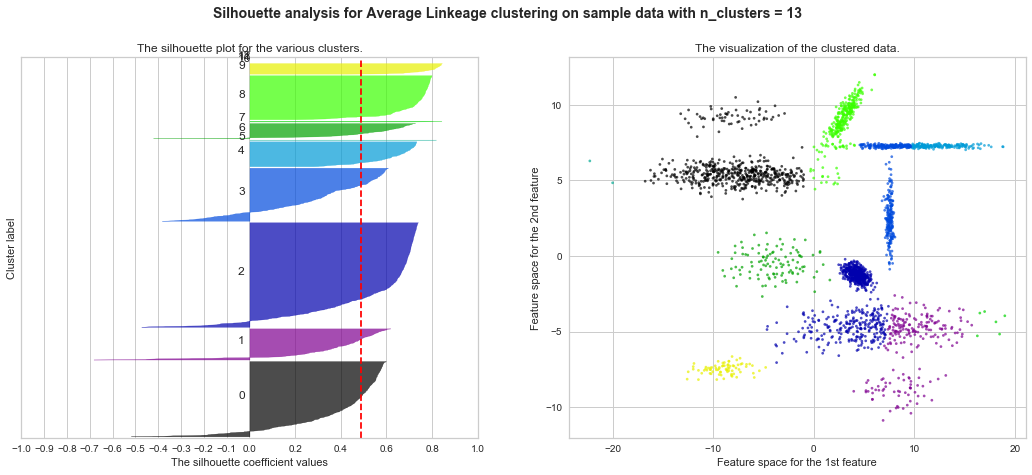

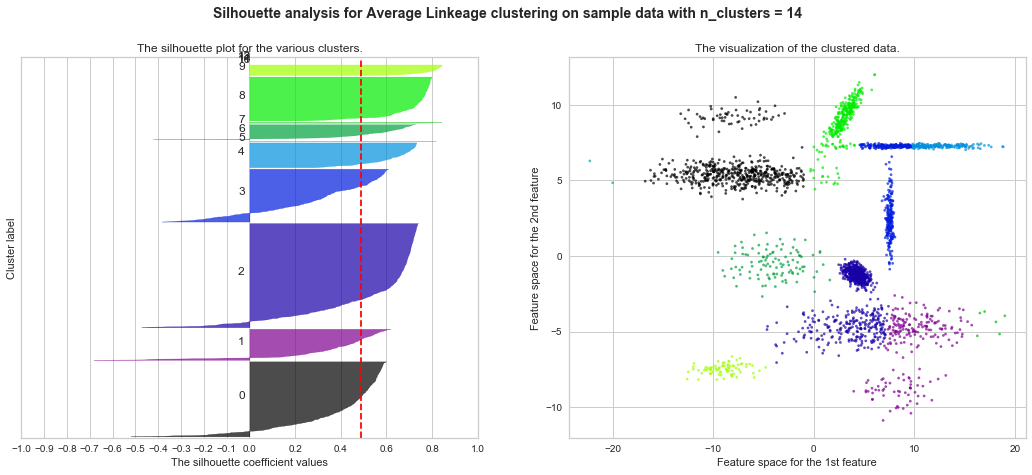

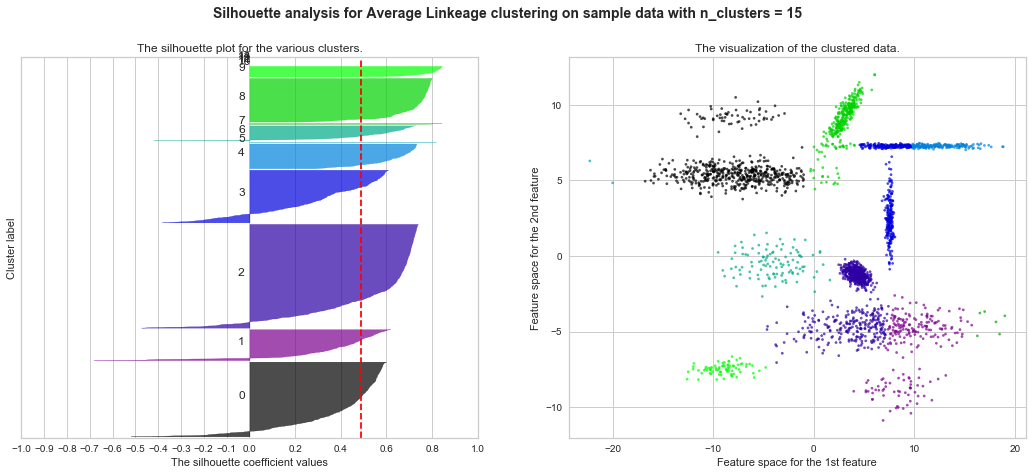

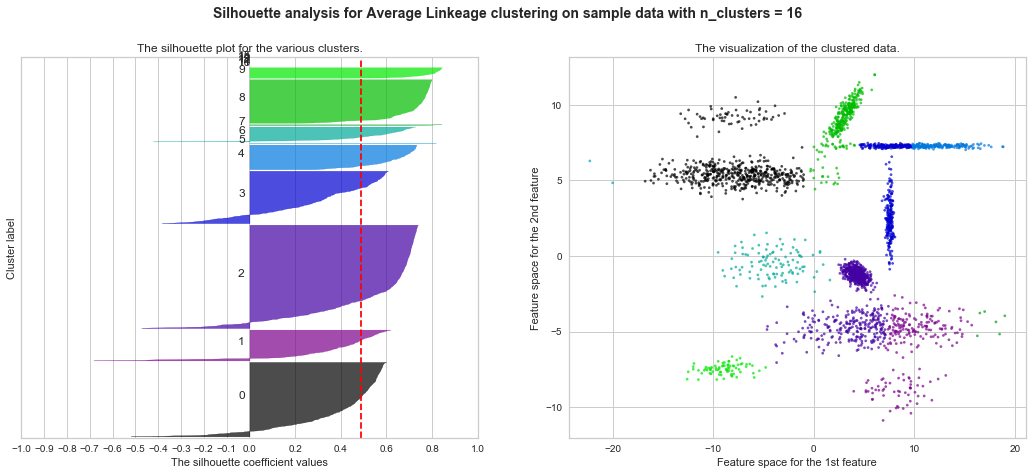

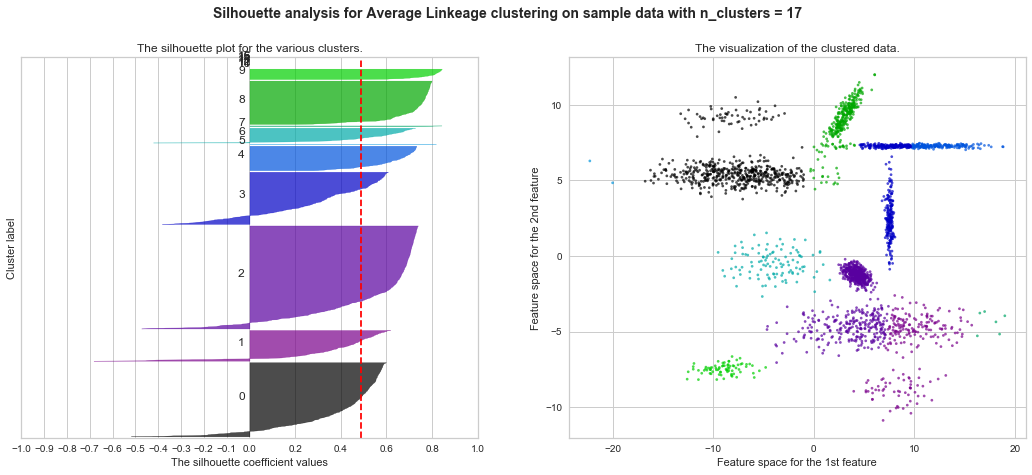

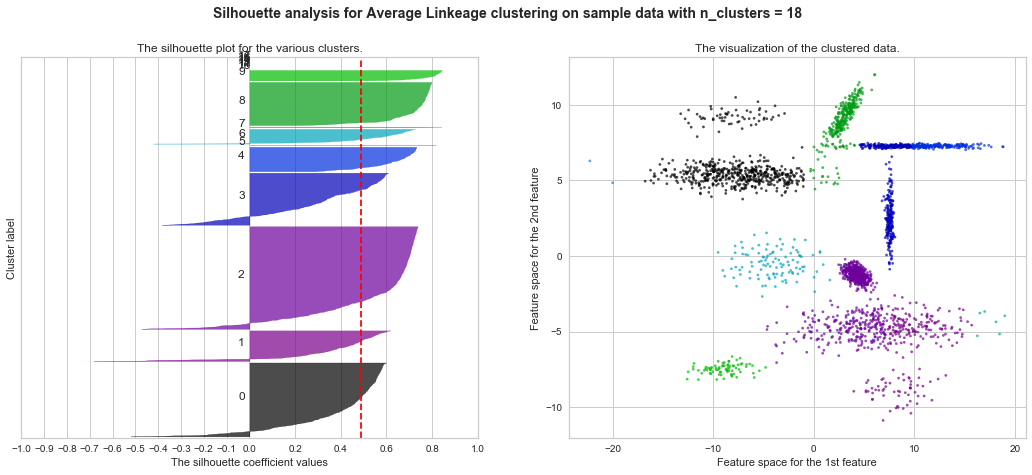

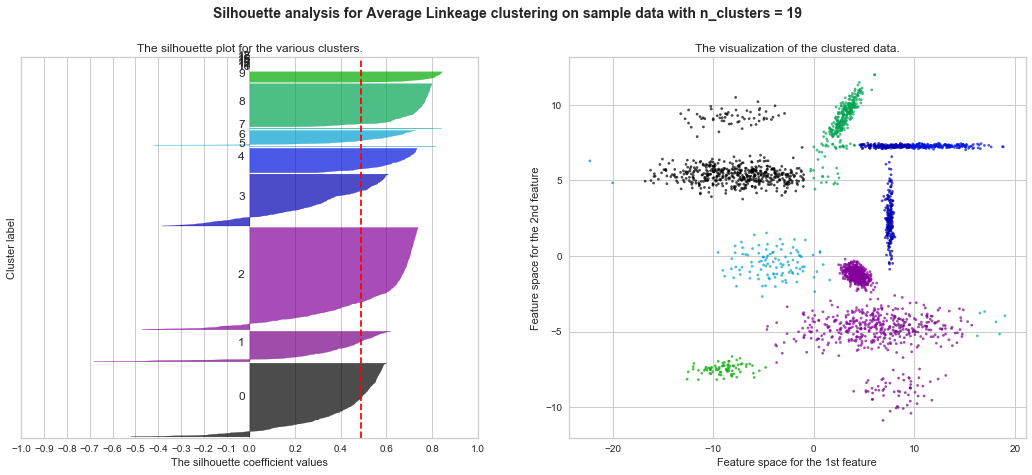

In [63]:

for n_clusters in range(2,20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(array2d10c[:,2]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')  
    cluster.fit_predict(array2d10c[:,:2])  

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(array2d10c[:,:2], cluster.labels_)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(array2d10c[:,:2], cluster.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster.labels_.astype(float) / n_clusters)
    ax2.scatter(array2d10c[:, 0], array2d10c[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Average Linkeage clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4856963157004019
For n_clusters = 3 The average silhouette_score is : 0.5283508105369378
For n_clusters = 4 The average silhouette_score is : 0.5258012352084065
For n_clusters = 5 The average silhouette_score is : 0.5229595423161736
For n_clusters = 6 The average silhouette_score is : 0.5139511153554619
For n_clusters = 7 The average silhouette_score is : 0.4987151059345101
For n_clusters = 8 The average silhouette_score is : 0.5203951752239406
For n_clusters = 9 The average silhouette_score is : 0.540520129311598
For n_clusters = 10 The average silhouette_score is : 0.5516326985839323
For n_clusters = 11 The average silhouette_score is : 0.5505605480182806
For n_clusters = 12 The average silhouette_score is : 0.5584569815641413
For n_clusters = 13 The average silhouette_score is : 0.5435963818360634
For n_clusters = 14 The average silhouette_score is : 0.5561294202334092
For n_clusters = 15 The average silhouette_score is : 0.5544

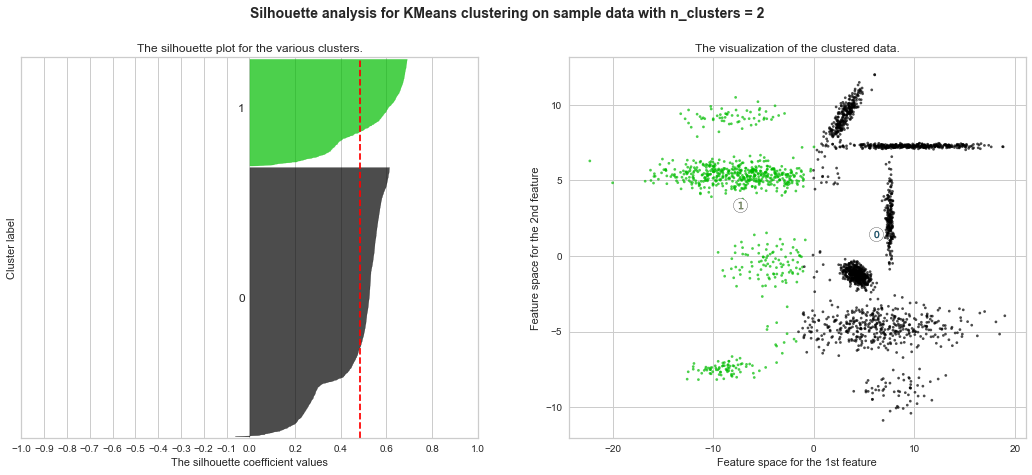

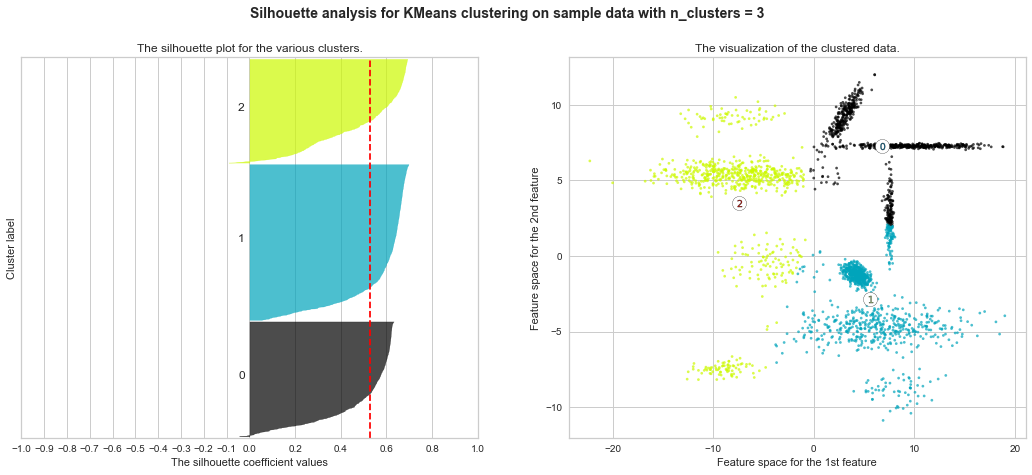

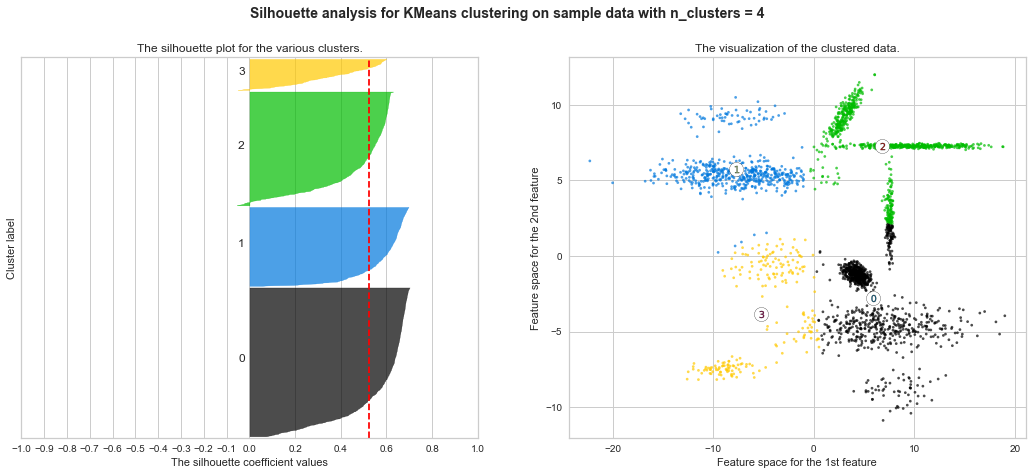

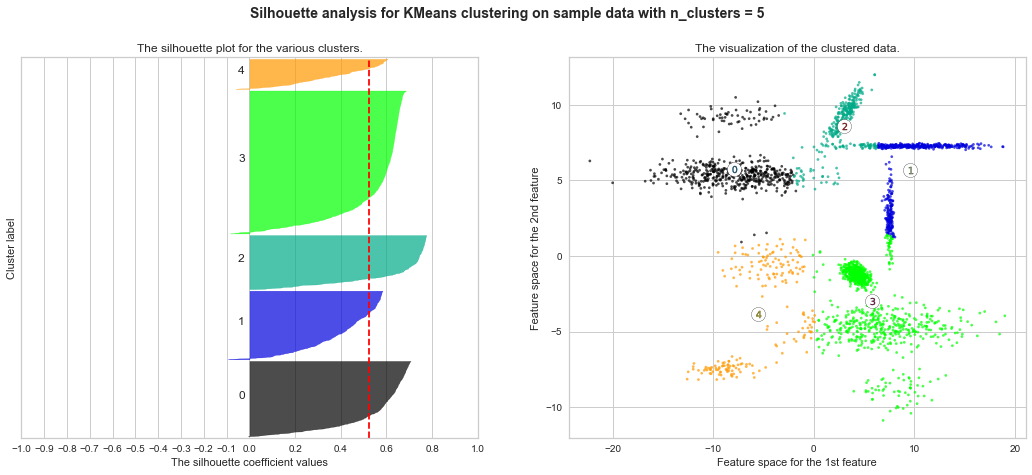

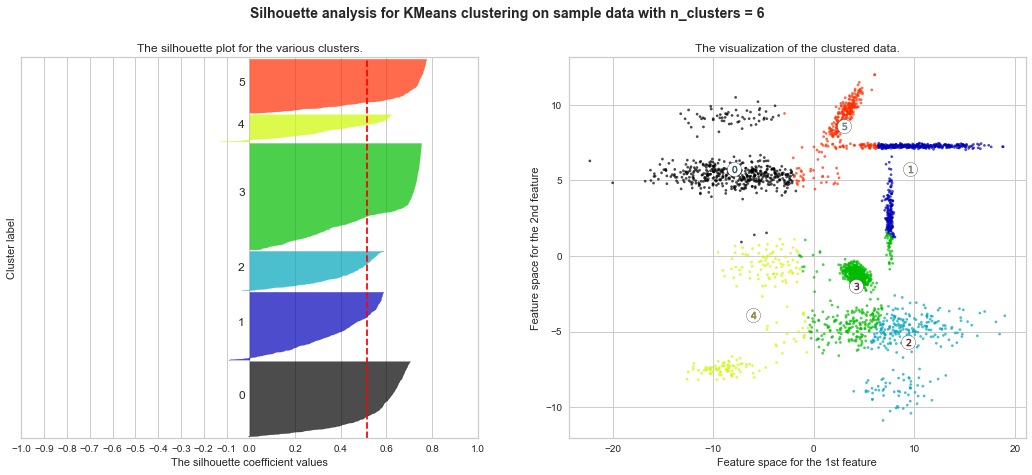

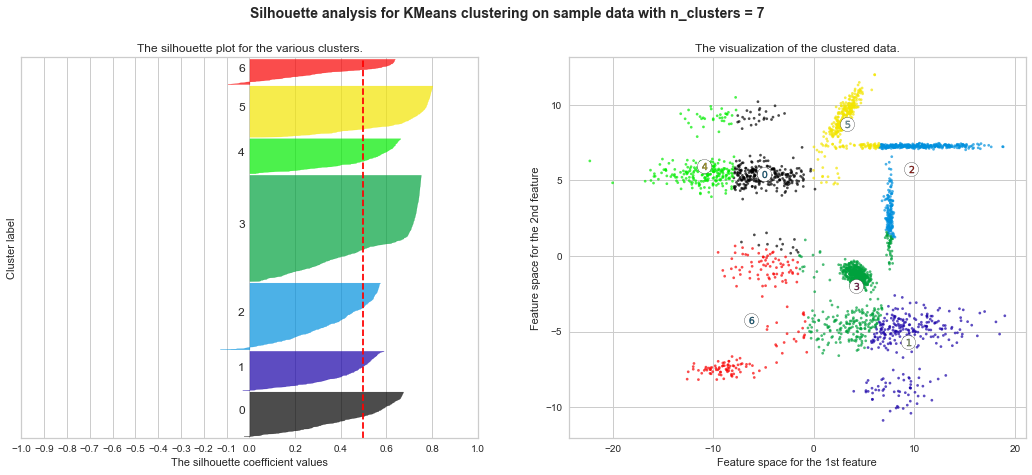

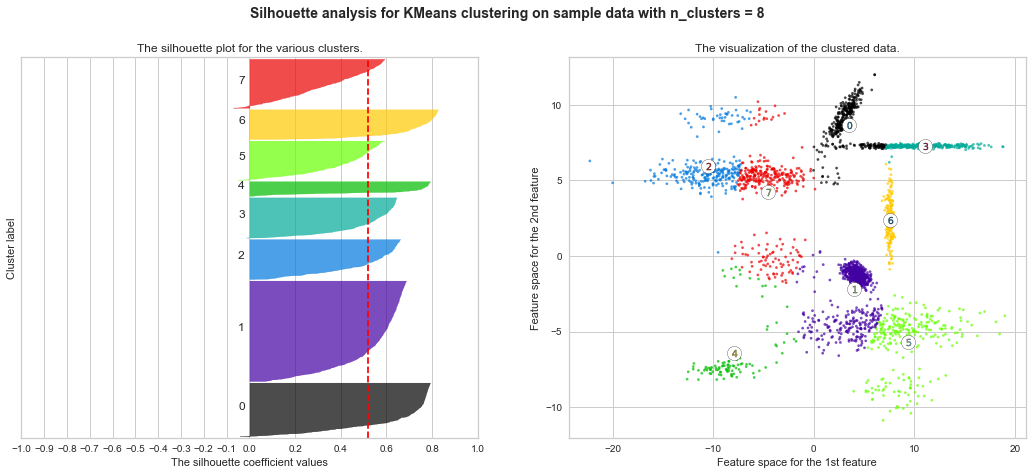

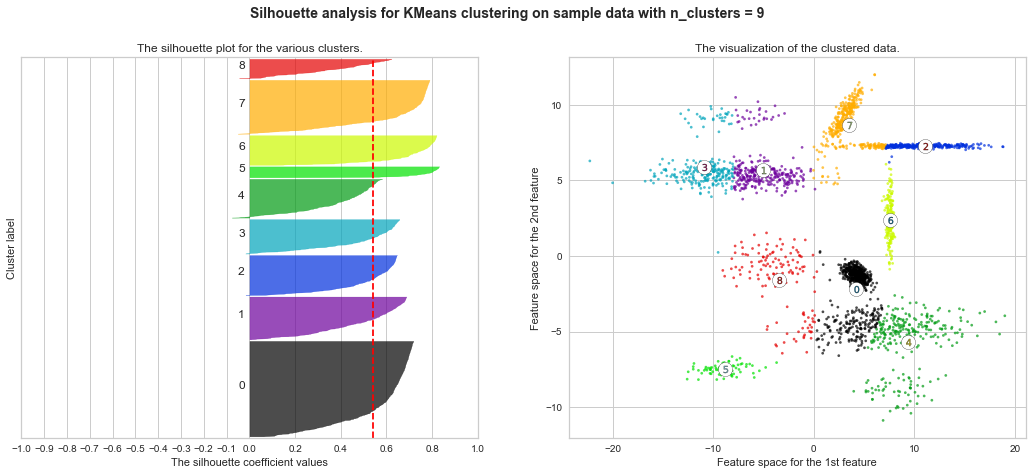

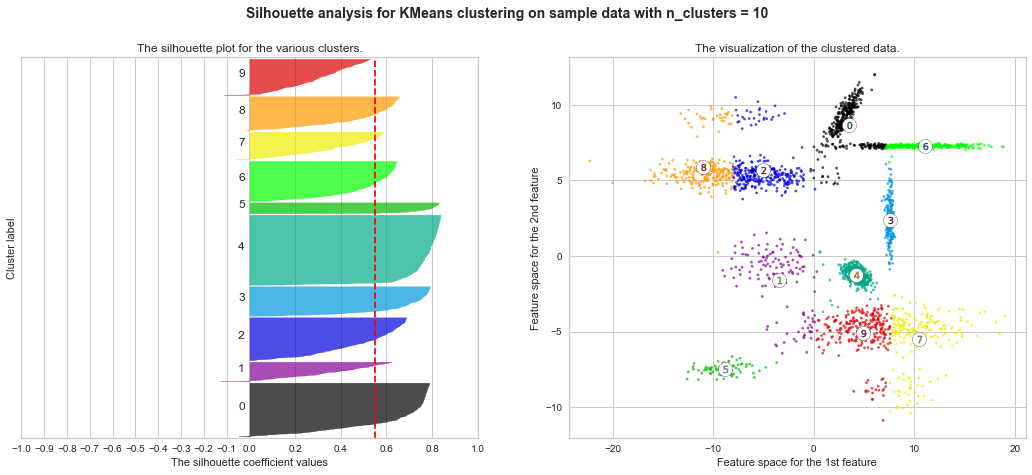

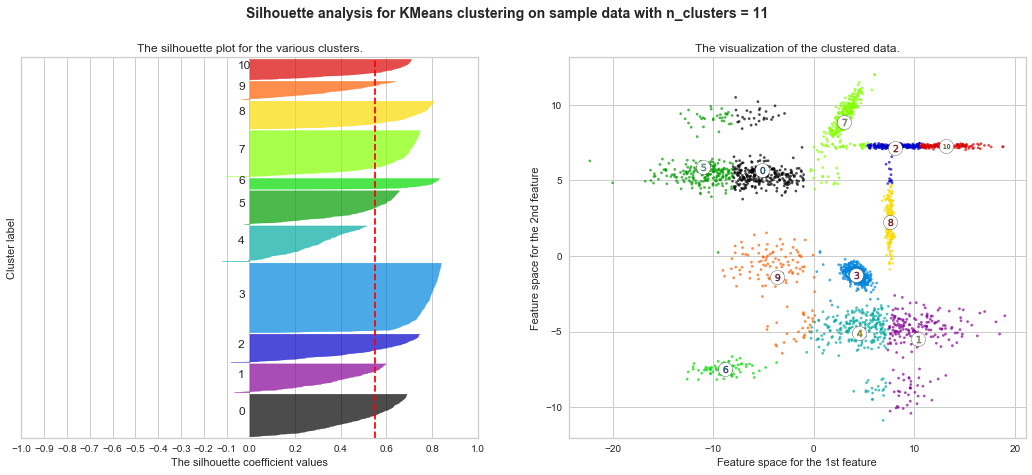

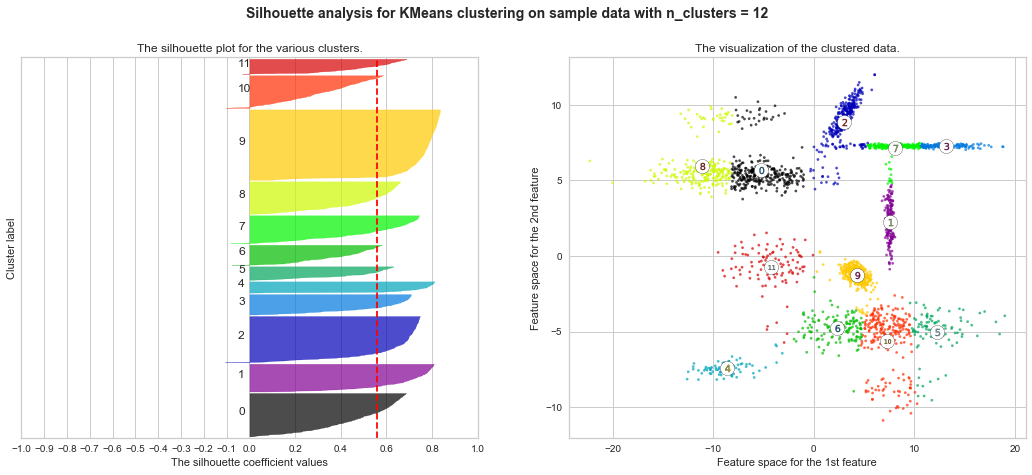

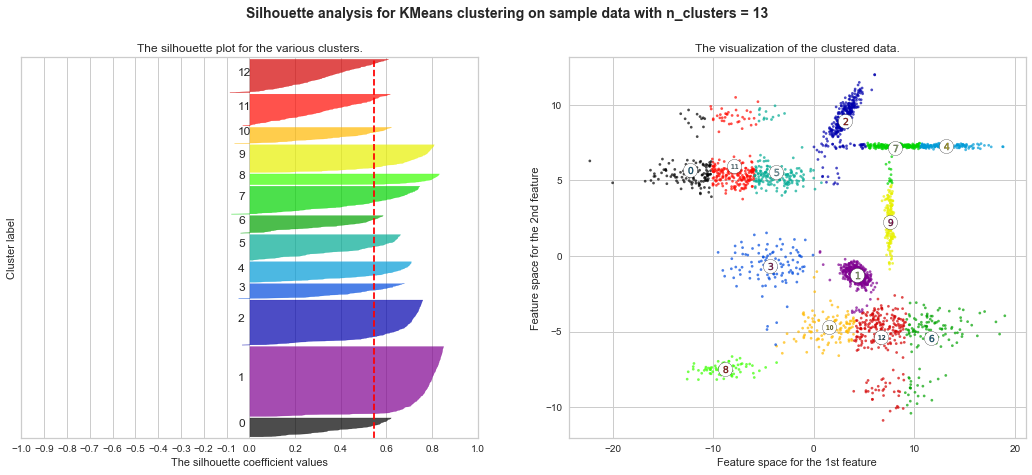

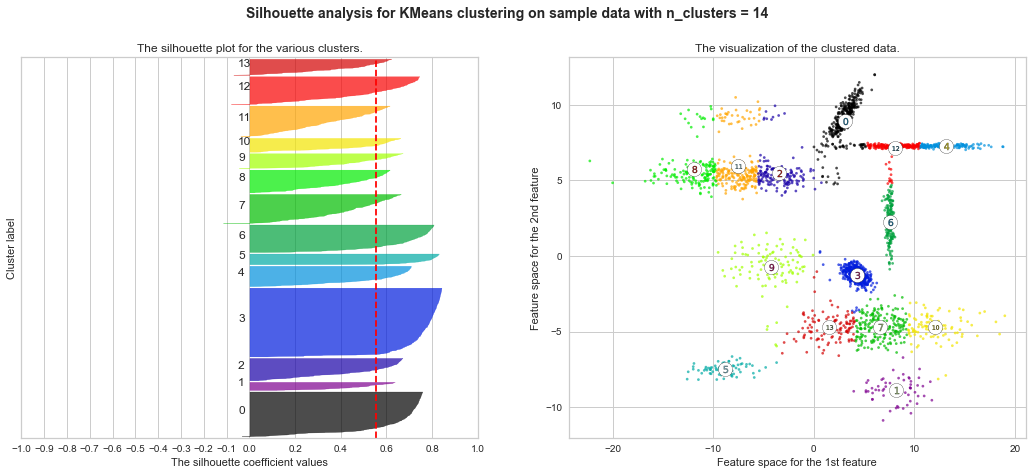

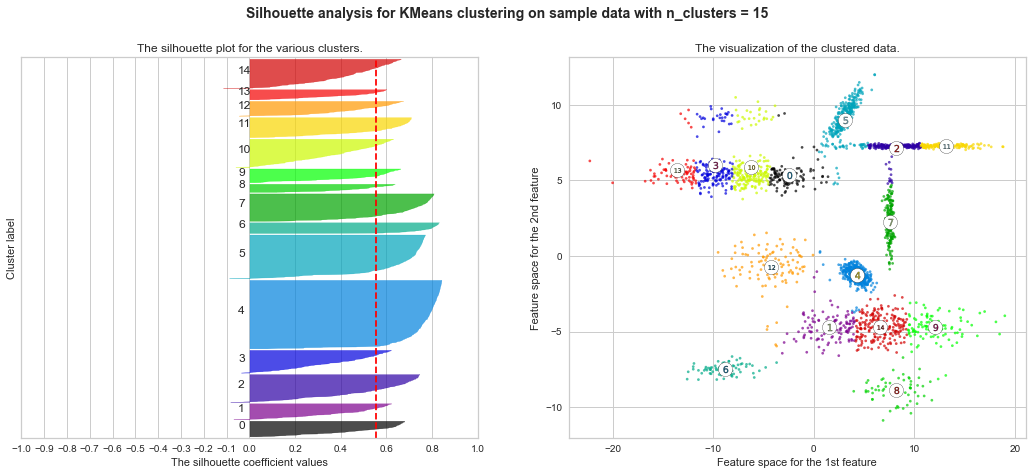

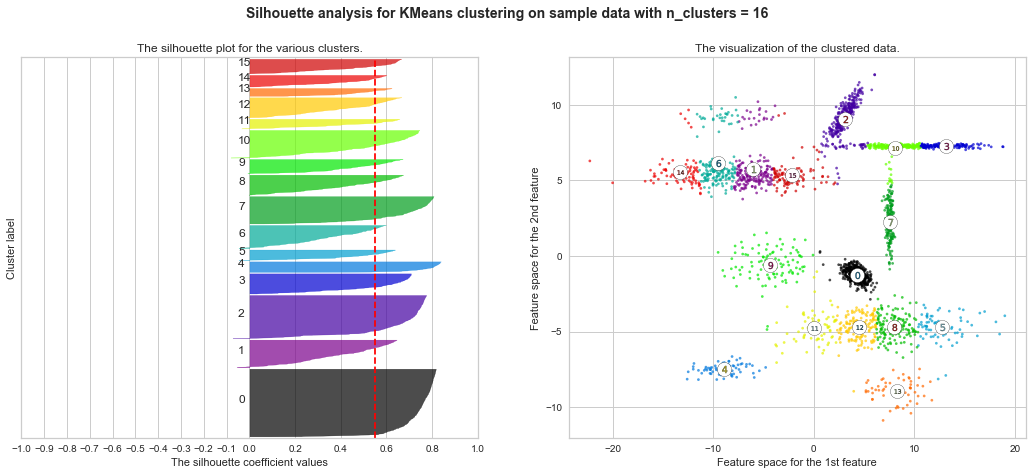

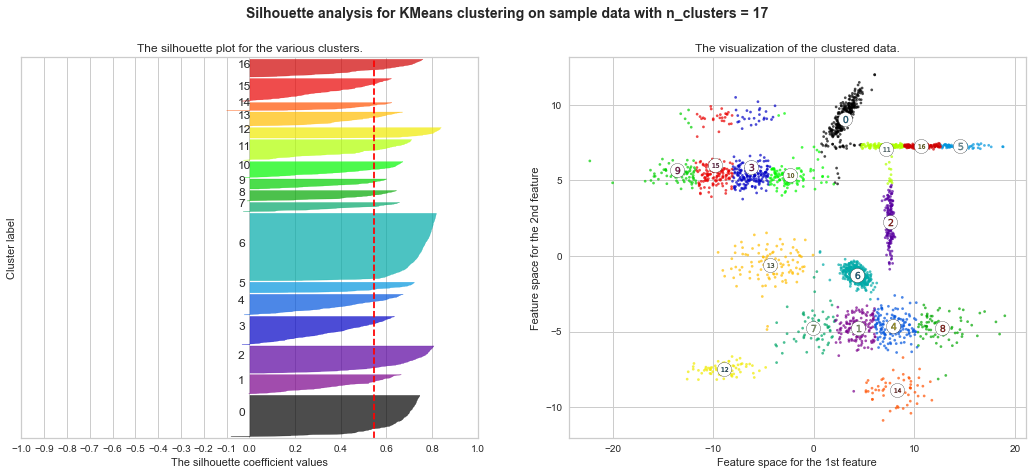

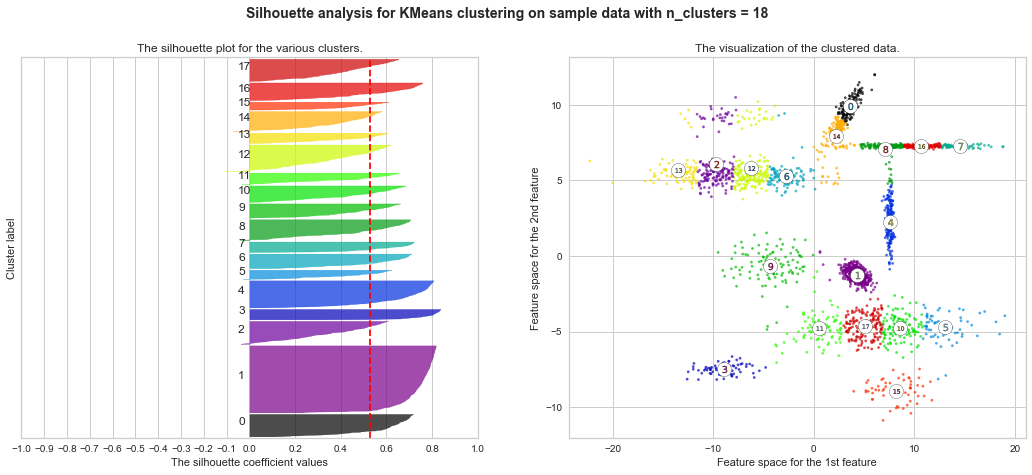

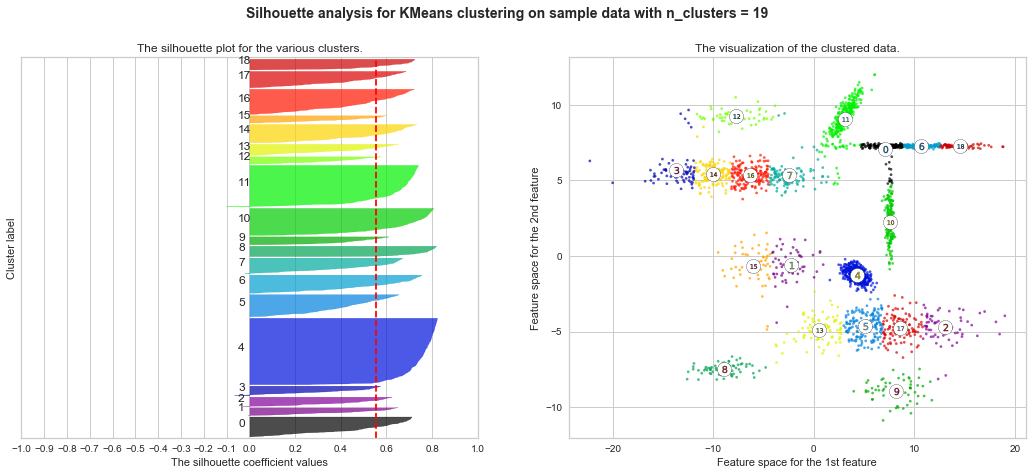

In [64]:
for n_clusters in range(2,20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(array2d10c[:,2]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(array2d10c[:,:2])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(array2d10c[:,:2], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(array2d10c[:,:2], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(array2d10c[:, 0], array2d10c[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()